In [51]:
# Import the dependencies.
import pandas as pd

import matplotlib.pyplot as plt
 
import numpy as np

from citipy import citipy

import time

from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [52]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [53]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [54]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [55]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.

    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)


615

In [56]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.

    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.

    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.

        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.

        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | sechura
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | sao jose da coroa grande
Processing Record 9 of Set 1 | north bend
Processing Record 10 of Set 1 | capanema
Processing Record 11 of Set 1 | nikki
Processing Record 12 of Set 1 | mizan teferi
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | garoua boulai
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | kidal
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | hithadhoo


KeyboardInterrupt: 

In [ ]:
# Tally the number of cities in the city_data array of dictionaries.

len(city_data)

580

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,70.03,77,1,8.05,CV,2022-04-15 07:49:03
1,Bluff,-46.6000,168.3333,58.15,77,96,10.40,NZ,2022-04-15 07:49:03
2,Arraial Do Cabo,-22.9661,-42.0278,73.33,78,100,22.48,BR,2022-04-15 07:49:04
3,Carnarvon,-24.8667,113.6333,86.07,54,71,11.50,AU,2022-04-15 07:49:04
4,Ushuaia,-54.8000,-68.3000,40.66,81,40,3.44,AR,2022-04-15 07:46:29
5,Sechura,-5.5569,-80.8222,68.45,80,99,12.57,PE,2022-04-15 07:49:04
6,Sao Jose Da Coroa Grande,-8.8978,-35.1478,77.22,83,54,6.31,BR,2022-04-15 07:49:05
7,North Bend,43.4065,-124.2243,39.85,96,20,6.91,US,2022-04-15 07:45:19
8,Capanema,-1.1958,-47.1808,73.47,98,100,2.19,BR,2022-04-15 07:49:05
9,Nikki,9.9401,3.2108,81.07,61,100,6.85,BJ,2022-04-15 07:49:05


In [84]:
# Reorder the columns in the following order: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.

city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-04-15 07:49:03,14.8961,-24.4956,70.03,77,1,8.05
1,Bluff,NZ,2022-04-15 07:49:03,-46.6000,168.3333,58.15,77,96,10.40
2,Arraial Do Cabo,BR,2022-04-15 07:49:04,-22.9661,-42.0278,73.33,78,100,22.48
3,Carnarvon,AU,2022-04-15 07:49:04,-24.8667,113.6333,86.07,54,71,11.50
4,Ushuaia,AR,2022-04-15 07:46:29,-54.8000,-68.3000,40.66,81,40,3.44


In [85]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [86]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

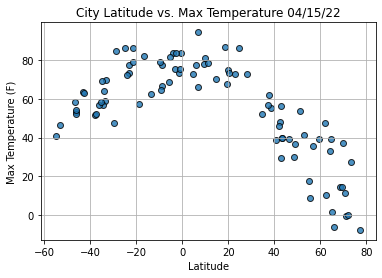

In [87]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temp.

plt.scatter(lats,
            max_temps,
            edgecolor ='black', linewidths=1, marker ='o',
            alpha=0.8, label='Cities')

#Incorporate the other graph properties.

plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.

plt.savefig('weather_data/Fig1.png')

# Show plot

plt.show

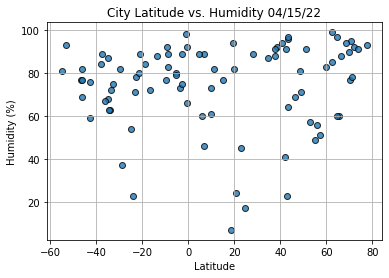

In [88]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

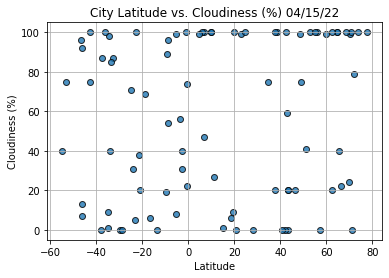

In [89]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

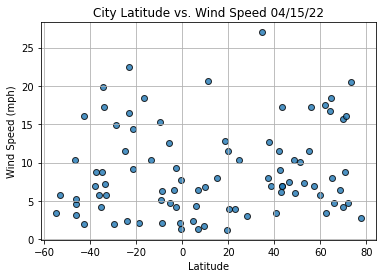

In [90]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [91]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [92]:
# Applying the loc method to create a new dffrom a current df. This method accesses a group of rows and columns by an index
#   labels, or a Boolean array.
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2022-04-15 07:46:24
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    51.87
Humidity                       84
Cloudiness                      0
Wind Speed                   6.91
Name: 13, dtype: object

In [93]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [101]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))                 

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))